In [8]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (14, 7)

In [2]:
# number of data points
n_points = 200

In [3]:
# set a seed here to initialize the random number generator
# (such that we get the same dataset each time this cell is executed)
numpy.random.seed(1)

# let's generate some "non-linear" data; note
# that the sorting step is done for visualization
# purposes only (to plot the models as connected lines)
X_train = numpy.random.uniform(-10,10, n_points)
t_train = - X_train**2 + numpy.random.random(n_points) * 25

# generate some points for plotting
X_plot = numpy.arange(X_train.min(), X_train.max(), 0.01)

# reshape all arrays to make sure that we deal with
# N-dimensional Numpy arrays
t_train = t_train.reshape((len(t_train), 1))
X_train = X_train.reshape((len(X_train),1))
X_plot = X_plot.reshape((len(X_plot), 1))

print("Shape of training data: %s" % str(X_train.shape))
print("Shape of target vector: %s" % str(t_train.shape))
print("Shape of plotting data: %s" % str(X_plot.shape))

Shape of training data: (200, 1)
Shape of target vector: (200, 1)
Shape of plotting data: (1995, 1)


In [4]:
import linreg

# instantiate the regression model
model = linreg.LinearRegression()

# fit the model
model.fit(X_train, t_train)

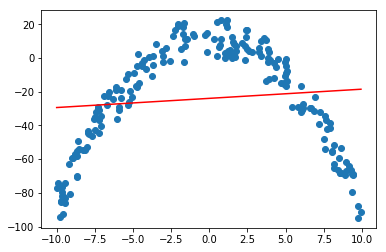

In [5]:
# get predictions for the data points
preds = model.predict(X_plot)

# plot the points and the linear regression model
plt.plot(X_train, t_train, 'o')
plt.plot(X_plot, preds, '-', color='red')
plt.show()

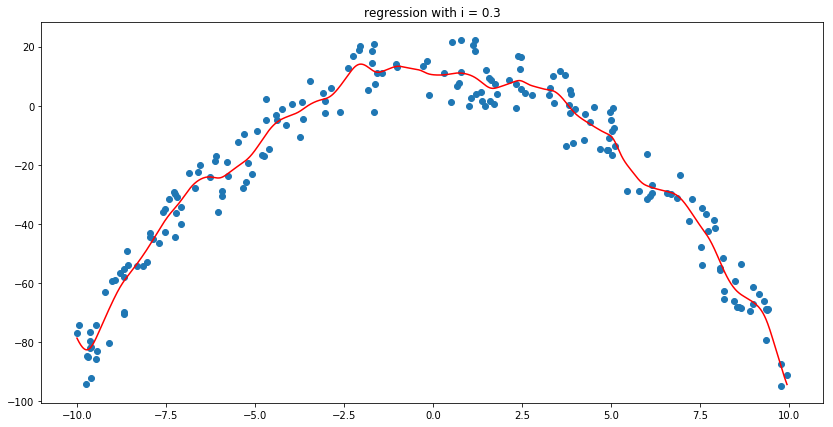

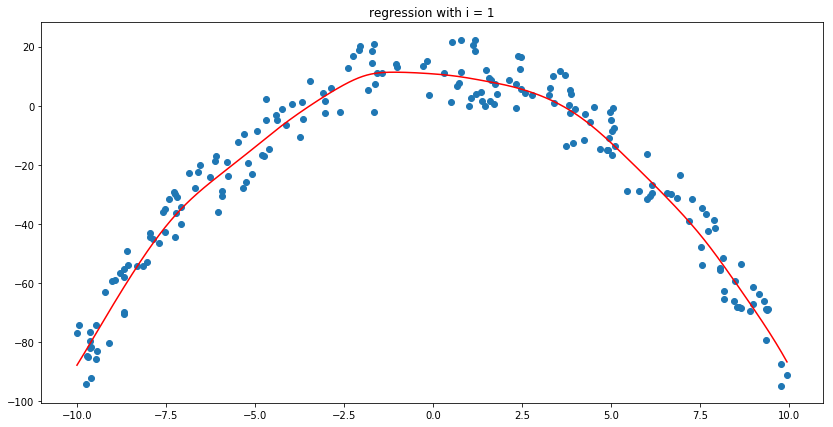

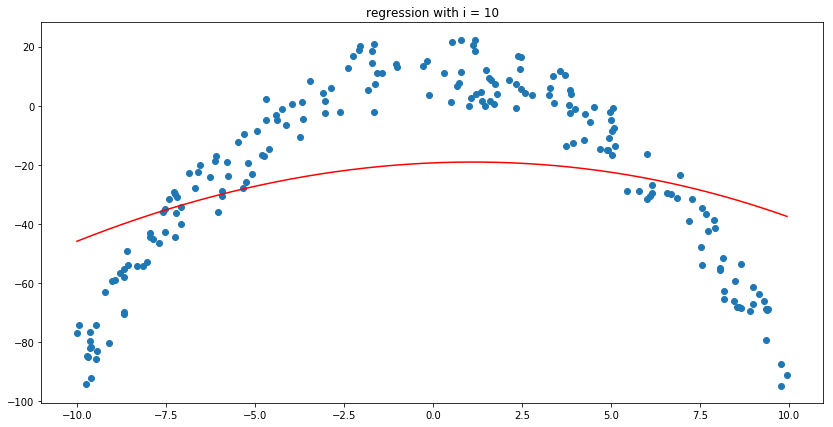

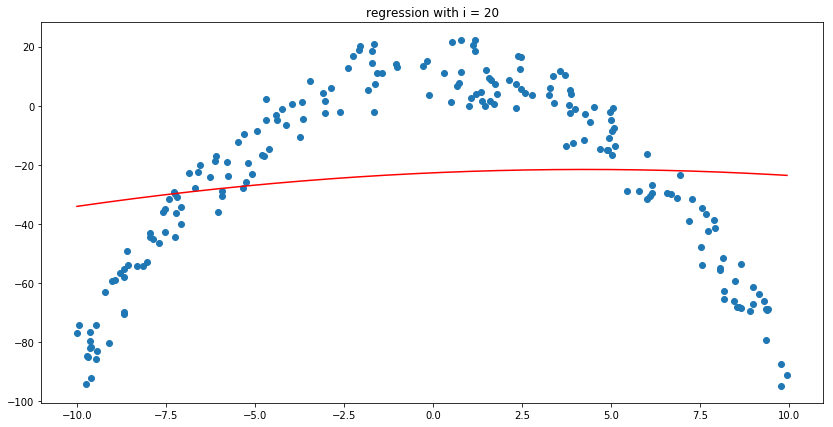

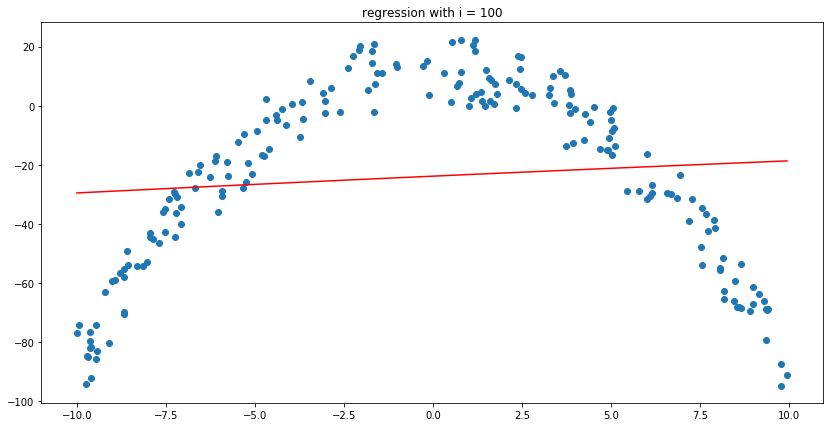

In [12]:
# 4 b)
def plotmodel(X_train,t_train,X_plot):
    nmodel = linreg.LinearRegression()
    # We don't run this with the sigma=0.1 we are supposed to
    # because the numerical inaccuracies become too big for
    # Python to handle, and the function will crash, citing 
    # a "Singular Matrix" problem because the entire h array
    # will be made up of 0s. We instead run it with 0.3
    for i in (0.3,1,10,20,100):
        npreds = np.zeros(X_plot.shape)
        for j in range(X_plot.shape[0]):
            nmodel.nonlinfit(X_train, t_train, X_plot[j], i)
        #print(nmodel.w)
        #print(X_plot.shape)
            npreds[j] = nmodel.predict(X_plot[j])
        plt.title(f"regression with i = {i}")
        plt.plot(X_train, t_train, 'o')
        plt.plot(X_plot, npreds, '-', color='red')
        plt.show()

#nmodel = linreg.LinearRegression()
#nmodel.nonlinfit(X_train, t_train, X_plot, 10)
#print(nmodel.w)
#print(X_plot.shape)
#npreds = nmodel.nonlinpredict(X_plot)

#plt.plot(X_train, t_train, 'o')
#plt.plot(X_plot, npreds, '-', color='red')
#plt.show()
plotmodel(X_train,t_train,X_plot)
# TODO: Implement the non-linear regression approach;
# generate corresponding plots for sigma=0.1, 
# sigma=1.0, and sigma=10.0 by computing, for each
# xbar in X_plot, the corresponding prediction